<img src='https://i.gifer.com/Hxp8.gif'>

<b>Train:</b> <br>
I want to feed the cat <br>
I want to give food to the cat <br>

I want to give food to the dog <br>
What should i buy for my dog <br>

<b>Test: </b> <br>
I have to make sure when I get home to feed the <b>(?)</b> <br><br>
<b>Какое слово стоит на последнем месте?</b> <br><br><br><br>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/ffnnlm.PNG?token=AgsinFYs1aVRT4mJYmn5_zbunb4EWMR2ks5cf3WdwA%3D%3D' width='60%'>

\begin{align}
\begin{aligned}
x &= (x_1, ..., x_n) \\
h &= \sigma(Wx + b) \\
z &= Uh \\
y &= softmax(z)
\end{aligned}
\end{align}

<b>Проблемы с таким подходом?</b> <br><br><br><br>

<ol>
<li> Ограничение на величину контекста, откуда можно извлечь информацию
<li> Одно и то же слово появляется в сочетании с разными словами
</ol>

<img src='https://cdn-images-1.medium.com/max/800/1*XosBFfduA1cZB340SSL1hg.png'>

<br>

<img src='https://i.makeagif.com/media/3-18-2018/RX_jMs.gif'>

<br>

<img src='https://cdn-images-1.medium.com/max/800/1*W51n2gqbRiAxIeL4E7phrw.jpeg'>

<h2>RNN</h2>

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXtntNXAvo7R2P4C_Neq0ljDyhabivSEM_ua_RL_C_hqSYSkE5cw'>

<h3>
\begin{align}
\begin{aligned}
h_t = f_w(h_{t-1}, x_t)
\end{aligned}
\end{align}
</h3>
! Та же функция и тот же набор параметров используются в разные моменты времени

<br><br>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/one_rnn_cell.PNG?token=AgsinKGQ6rtxJv8kN_aVMwy437l-ZPKvks5cf3XcwA%3D%3D'>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/many_rnn_cells.PNG?token=AgsinFXw3SM0g9vHB6ZZ3akx6vkBNER7ks5cf3XbwA%3D%3D'>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/many_rnn_cells_with_w.PNG?token=AgsinLEj215b735IHiUfWfuNn_qqjmHGks5cf3XbwA%3D%3D'>

<br><br>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/rnn_sentiment_analysis.PNG?token=AgsinPVVhbqAzntwFrepoGvB3hIVMcUwks5cf3XdwA%3D%3D'>

<br>

<h2>Vanilla RNN</h2>

<h3>
\begin{align}
\begin{aligned}
h_t = f_w(h_{t-1}, x_t)
\end{aligned}
\end{align}
</h3>
<b>Какую функцию можно использовать вместо f_w?</b>

<br><br>

<h3>
\begin{align}
\begin{aligned}
h_t &= \phi(W_{hh}h_{t-1} + W_{xh}x_t + b)
\end{aligned}
\end{align}
</h3>

<h3>
\begin{align}
\begin{aligned}
h_t &= tanh(W_{hh}h_{t-1} + W_{xh}x_t) \\
y_t &= W_{hy}h_t
\end{aligned}
\end{align}
</h3>

<img src='https://betanews.com/wp-content/uploads/2017/06/reinvent-wheel.jpg' width='50%' height='50%'>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [ ]:
# for the sake of reproducibility 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
reset_graph()

n_features = 3
n_neurons = 5

# two time steps
X0 = # your code here
X1 = # your code here

Wx = tf.Variable(tf.random_normal(shape=["""your code here"""], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=["""your code here"""], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# tanh as phi
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = # your code here

init = tf.global_variables_initializer()

In [ ]:
# mini-batches of size 4
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])  # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])  # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [ ]:
Y0_val

In [ ]:
Y1_val

<img src='https://www.uxmas.com/images/uploads/wheelsinc.jpg' width='70%' height='70%'>

In [ ]:
reset_graph()

n_features = 3
n_steps = 2
n_neurons = 5

# rnn model
X = tf.placeholder(tf.float32, [None, n_steps, n_features])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

In [ ]:
X_batch = np.hstack([X0_batch[:, np.newaxis, :], X1_batch[:, np.newaxis, :]])

with tf.Session() as sess:
    init.run()
    output = sess.run(output, feed_dict={X: X_batch})

In [ ]:
output

<b>Покажем, что ячейка Vanilla RNN похожа на один слой FFNN</b> <br>
Дано: <br>
n = 2 - размер вектора скрытого слоя <br>
m = 3 - размер входного вектора <br>
$W_{hh} = W$ <br>
$W_{xh} = U$ <br>

<h4>Backpropagation through time</h4>

<img src='https://github.com/fogside/fintech_dev/blob/master/spring_2019/04_rnn_dropout/backprop_through_time.PNG?raw=true'>

<b>Какие проблемы могут возникнуть?</b>

<br>

<b>Какое решение можно предложить?</b>

<br><br>

<h4>Truncated Backpropagation through time</h4>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/trunked_backprop_through_time.PNG?token=AgsinLY0GxLfNNCMZKCeUt6D1WW-DNpoks5cf3XewA%3D%3D'>

<h3>
\begin{align}
\begin{aligned}
h_t &= tanh(W[\begin{matrix}h_{t-1}\\x_t\end{matrix}])
\end{aligned}
\end{align}
</h3>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/vanilla_rnn_back.PNG?token=AgsinLfoDUxtg1gZ0foiMUmMKcThyTNIks5cf3XfwA%3D%3D'>

<b>Как вычисляется backpropagation для линейного слоя?</b> <br>
Дано: <br>
$Y = XW$ <br>
$L$ - функция потерь <br>
Известно $\frac{dL}{dY}$ <br>
Найти: <br>
$\frac{dL}{dX}$ и $\frac{dL}{dW}$ <br>

http://cs231n.stanford.edu/handouts/linear-backprop.pdf

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/vanilla_rnns_back.PNG?token=AgsinE7OM3qYoDd1QAKuxT2EdIXfOa-Jks5cf3XgwA%3D%3D'>

<b>Какие могут возникнуть проблемы?</b>

<br><br>

<ul>
<li> Наибольшее сингулярное число матрицы W > 1 --> взрыв градиента
<li>Наибольшее сингулярное число матрицы W < 1 --> затухание градиента
</ul>

<h3>Взрыв градиента</h3> <br>
<img src='https://i.chzbgr.com/full/8235382528/h80588349/'>
<br><br>
<b>Решение:</b> gradient clipping
<img src='https://qph.fs.quoracdn.net/main-qimg-d0f12f2e19359820bfa909467a928141.webp'>
<br>
<img src='https://3.bp.blogspot.com/-IXaQmQ38taY/WV363FK3GqI/AAAAAAAAFSg/VGDL247YF4Eq0Sr4kL8EeRORXhihCcrDACLcBGAs/s1600/norm_clipping.png'>

<h3>Затухание градиента</h3> <br>
<img src='https://media.tenor.com/images/58cde3f79c7d74bf58ffba202dd19ee3/tenor.gif'>
<br><br>
<b>Решение:</b> Изменение архитектуры

<h2>LSTM</h2>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png'>

<img src='http://iflex.com/blog/wp-content/uploads/2018/07/Upgrade.jpeg' width="60%" height="60%">

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png'>

<img src='https://media.tenor.com/images/8d793b41eb1fd5e6502c3776fc3c2d06/tenor.gif' width="30%" height="30%">

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png'>

\begin{aligned}
f_{t}&=\sigma _{g}(W_{f}x_{t}+U_{f}h_{t-1}+b_{f}) \\
i_{t}&=\sigma _{g}(W_{i}x_{t}+U_{i}h_{t-1}+b_{i}) \\
o_{t}&=\sigma _{g}(W_{o}x_{t}+U_{o}h_{t-1}+b_{o}) \\
c_{t}&=f_{t}\circ c_{t-1}+i_{t}\circ \sigma _{c}(W_{c}x_{t}+U_{c}h_{t-1}+b_{c}) \\
h_{t}&=o_{t}\circ \sigma _{h}(c_{t})
\end{aligned}

<br><br><br><br>
<b>В чем польза использования tanh как функции активации?</b>
<br><br><br><br>

<br><br><br><br>
<img src='https://cdn-images-1.medium.com/max/1600/1*iRlEg1GBKRzGTre5aOQUCg.gif' width="70%" height="70%">

<br>

<img src='https://cdn-images-1.medium.com/max/1600/1*LgbEFcGiUpseZ--M7wuZhg.gif' width="70%" height="70%">

<br>

<img src='https://cdn-images-1.medium.com/max/1600/1*gFC2bTg3uihp1klknWU0qg.gif' width="70%" height="70%">

### Варианты LSTM

<img src='https://media1.tenor.com/images/ec993f9c09cff9d21e62482cbeed8262/tenor.gif?itemid=10344359'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-peepholes.png'>

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-tied.png'>

<h2>GRU</h2>

<img src='https://media1.tenor.com/images/59c24c85451ec07de13435ba7259b8c0/tenor.gif?itemid=8051848' width="50%" height="50%">

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png'>

\begin{aligned}
z_{t}&=\sigma _{g}(W_{z}x_{t}+U_{z}h_{t-1}+b_{z}) \\
r_{t}&=\sigma _{g}(W_{r}x_{t}+U_{r}h_{t-1}+b_{r}) \\
h_{t}&=(1-z_{t})\circ h_{t-1}+z_{t}\circ \sigma _{h}(W_{h}x_{t}+U_{h}(r_{t}\circ h_{t-1})+b_{h})
\end{aligned}

<b>Какая проблема есть у всех описанных выше подходов?</b>
<br><br><br><br>

<img src='https://pics.me.me/when-you-enter-a-room-but-forget-what-you-wanted-23455102.png' width="50%" height="50%">

<h2>Bidirectional rnn</h2>

<img src='https://cdn-images-1.medium.com/max/880/1*HNF-Klzkex58xRkxWvI0dw.png' width="50%" height="50%">
<br>

<img src='https://cdn-images-1.medium.com/max/880/1*wMrAZm4wlfqbdoduxZ7WSQ.png' width="50%" height="50%">
<br>

<img src='https://cdn-images-1.medium.com/max/880/1*PB5HXSXOGJrnDa_Si4nj9Q.png' width="50%" height="50%">
<br>

<br><br>

<b>В чем разница между CNN и RNN?</b>

https://arxiv.org/pdf/1702.01923.pdf

<br><br>

In [29]:
import os
import string
import tempfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.preprocessing import sequence
from tensorboard import summary as summary_lib

tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)

1.12.0


In [30]:
vocab_size = 5000
sentence_size = 200
embedding_size = 50
model_dir = tempfile.mkdtemp()

# we assign the first indices in the vocabulary to special tokens that we use
# for padding, as start token, and for indicating unknown words
pad_id = 0
start_id = 1
oov_id = 2
index_offset = 2

print("Loading data...")
(x_train_variable, y_train), (x_test_variable, y_test) = imdb.load_data(
    num_words=vocab_size, start_char=start_id, oov_char=oov_id,
    index_from=index_offset)
print(len(y_train), "train sequences")
print(len(y_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train_variable, 
                                 maxlen=sentence_size,
                                 truncating='post',
                                 padding='post',
                                 value=pad_id)
x_test = sequence.pad_sequences(x_test_variable, 
                                maxlen=sentence_size,
                                truncating='post',
                                padding='post', 
                                value=pad_id)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [31]:
word_index = imdb.get_word_index()
word_inverted_index = {v + index_offset: k for k, v in word_index.items()}

# The first indexes in the map are reserved to represent things other than tokens
word_inverted_index[pad_id] = '<PAD>'
word_inverted_index[start_id] = '<START>'
word_inverted_index[oov_id] = '<OOV>'

for i in range(0, 10):
  print(i, word_inverted_index[i])
  
def index_to_text(indexes):
    return ' '.join([word_inverted_index[i] for i in indexes])

print(index_to_text(x_train_variable[0]))

1646592/1641221 [==============================] - 0s 0us/step
0 <PAD>
1 <START>
2 <OOV>
3 the
4 and
5 a
6 of
7 to
8 is
9 br
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <OOV> is an amazing actor and now the same being director <OOV> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <OOV> and would recommend it to everyone to watch and the fly <OOV> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <OOV> to the two little <OOV> that played the <OOV> of norman and paul they were just brilliant children are often left out of the <OOV> list i think because the stars that pl

In [32]:
x_len_train = np.array([min(len(x), sentence_size) for x in x_train_variable])
x_len_test = np.array([min(len(x), sentence_size) for x in x_test_variable])

def parser(x, length, y):
    features = {"x": x, "len": length}
    return features, y

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((x_train, x_len_train, y_train))
    dataset = dataset.shuffle(buffer_size=len(x_train_variable))
    dataset = dataset.batch(100)
    dataset = dataset.map(parser)
    dataset = dataset.repeat()
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((x_test, x_len_test, y_test))
    dataset = dataset.batch(100)
    dataset = dataset.map(parser)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

In [36]:
all_classifiers = {}
def train_and_evaluate(classifier):
    # Save a reference to the classifier to run predictions later
    all_classifiers[classifier.model_dir] = classifier
    classifier.train(input_fn=train_input_fn, steps=25000)
    eval_results = classifier.evaluate(input_fn=eval_input_fn)
    predictions = np.array([p['logistic'][0] for p in classifier.predict(input_fn=eval_input_fn)])
        
    # Reset the graph to be able to reuse name scopes
    tf.reset_default_graph() 
    # Add a PR summary in addition to the summaries that the classifier writes
    pr = summary_lib.pr_curve('precision_recall', predictions=predictions, labels=y_test.astype(bool), num_thresholds=21)
    with tf.Session() as sess:
        writer = tf.summary.FileWriter(os.path.join(classifier.model_dir, 'eval'), sess.graph)
        writer.add_summary(sess.run(pr), global_step=0)
        writer.close()

In [37]:
head = tf.contrib.estimator.binary_classification_head()

def lstm_model_fn(features, labels, mode):    
    # [batch_size x sentence_size x embedding_size]
    inputs = tf.contrib.layers.embed_sequence(
        features['x'], vocab_size, embedding_size,
        initializer=tf.random_uniform_initializer(-1.0, 1.0))

    # create an LSTM cell of size 100
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(100)
    
    # create the complete LSTM
    _, final_states = tf.nn.dynamic_rnn(
        lstm_cell, inputs, sequence_length=features['len'], dtype=tf.float32)

    # get the final hidden states of dimensionality [batch_size x sentence_size]
    outputs = final_states.h

    logits = tf.layers.dense(inputs=outputs, units=1)

    # This will be None when predicting
    if labels is not None:
        labels = tf.reshape(labels, [-1, 1])

    optimizer = tf.train.AdamOptimizer()

    def _train_op_fn(loss):
        return optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())

    return head.create_estimator_spec(
        features=features,
        labels=labels,
        mode=mode,
        logits=logits,
        train_op_fn=_train_op_fn)


lstm_classifier = tf.estimator.Estimator(model_fn=lstm_model_fn,
                                         model_dir=os.path.join(model_dir, 'lstm'))
train_and_evaluate(lstm_classifier)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplq70z2_r/lstm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0c6abaa3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which support

INFO:tensorflow:global_step/sec: 2.9241
INFO:tensorflow:loss = 0.0059428834, step = 6401 (34.199 sec)
INFO:tensorflow:global_step/sec: 2.95455
INFO:tensorflow:loss = 0.0009872862, step = 6501 (33.846 sec)
INFO:tensorflow:global_step/sec: 2.9914
INFO:tensorflow:loss = 0.00077918364, step = 6601 (33.429 sec)
INFO:tensorflow:global_step/sec: 3.00698
INFO:tensorflow:loss = 0.0011633678, step = 6701 (33.256 sec)
INFO:tensorflow:global_step/sec: 2.97289
INFO:tensorflow:loss = 0.00048145608, step = 6801 (33.637 sec)
INFO:tensorflow:Saving checkpoints for 6865 into /tmp/tmplq70z2_r/lstm/model.ckpt.
INFO:tensorflow:global_step/sec: 3.00465
INFO:tensorflow:loss = 0.000424539, step = 6901 (33.282 sec)
INFO:tensorflow:global_step/sec: 2.93408
INFO:tensorflow:loss = 0.0010001207, step = 7001 (34.082 sec)
INFO:tensorflow:global_step/sec: 2.95056
INFO:tensorflow:loss = 0.0008488253, step = 7101 (33.893 sec)
INFO:tensorflow:global_step/sec: 2.95795
INFO:tensorflow:loss = 0.00078254327, step = 7201 (33

INFO:tensorflow:Saving checkpoints for 13979 into /tmp/tmplq70z2_r/lstm/model.ckpt.
INFO:tensorflow:global_step/sec: 2.97661
INFO:tensorflow:loss = 7.325167e-05, step = 14001 (33.595 sec)
INFO:tensorflow:global_step/sec: 2.98988
INFO:tensorflow:loss = 5.409704e-05, step = 14101 (33.446 sec)
INFO:tensorflow:global_step/sec: 2.92519
INFO:tensorflow:loss = 9.975562e-05, step = 14201 (34.186 sec)
INFO:tensorflow:global_step/sec: 2.91473
INFO:tensorflow:loss = 9.416463e-05, step = 14301 (34.309 sec)
INFO:tensorflow:global_step/sec: 2.91331
INFO:tensorflow:loss = 6.0684102e-05, step = 14401 (34.325 sec)
INFO:tensorflow:global_step/sec: 2.97093
INFO:tensorflow:loss = 3.8031187e-05, step = 14501 (33.659 sec)
INFO:tensorflow:global_step/sec: 3.00743
INFO:tensorflow:loss = 3.3141536e-05, step = 14601 (33.251 sec)
INFO:tensorflow:global_step/sec: 3.01425
INFO:tensorflow:loss = 3.5284756e-05, step = 14701 (33.176 sec)
INFO:tensorflow:global_step/sec: 2.96259
INFO:tensorflow:loss = 5.8230562e-05, s

INFO:tensorflow:loss = 1.5156547e-06, step = 21401 (32.800 sec)
INFO:tensorflow:global_step/sec: 2.93142
INFO:tensorflow:loss = 1.4895751e-06, step = 21501 (34.114 sec)
INFO:tensorflow:global_step/sec: 2.98401
INFO:tensorflow:loss = 4.380268e-07, step = 21601 (33.512 sec)
INFO:tensorflow:global_step/sec: 2.96073
INFO:tensorflow:loss = 1.1010928e-06, step = 21701 (33.775 sec)
INFO:tensorflow:global_step/sec: 3.01348
INFO:tensorflow:loss = 4.1604676e-07, step = 21801 (33.184 sec)
INFO:tensorflow:global_step/sec: 2.93952
INFO:tensorflow:loss = 5.603453e-07, step = 21901 (34.021 sec)
INFO:tensorflow:global_step/sec: 2.98959
INFO:tensorflow:loss = 4.5433273e-07, step = 22001 (33.449 sec)
INFO:tensorflow:global_step/sec: 2.99746
INFO:tensorflow:loss = 6.4365025e-07, step = 22101 (33.361 sec)
INFO:tensorflow:global_step/sec: 3.11375
INFO:tensorflow:loss = 1.6425493e-07, step = 22201 (32.115 sec)
INFO:tensorflow:global_step/sec: 2.98903
INFO:tensorflow:loss = 3.9150166e-07, step = 22301 (33.45

<br><br>

## Dropout

https://arxiv.org/abs/1207.0580

<img src='https://habrastorage.org/web/225/c44/513/225c44513c21431399c64cd91a9e2036.png' height='70%' width='70%'>

Проблемы:
- переобучение
- сложность комбинирования большего числа сетей
<br><br>

<img src='https://cdn-images-1.medium.com/max/800/1*D8jriroKkjno8RztHKmMnA.png'>

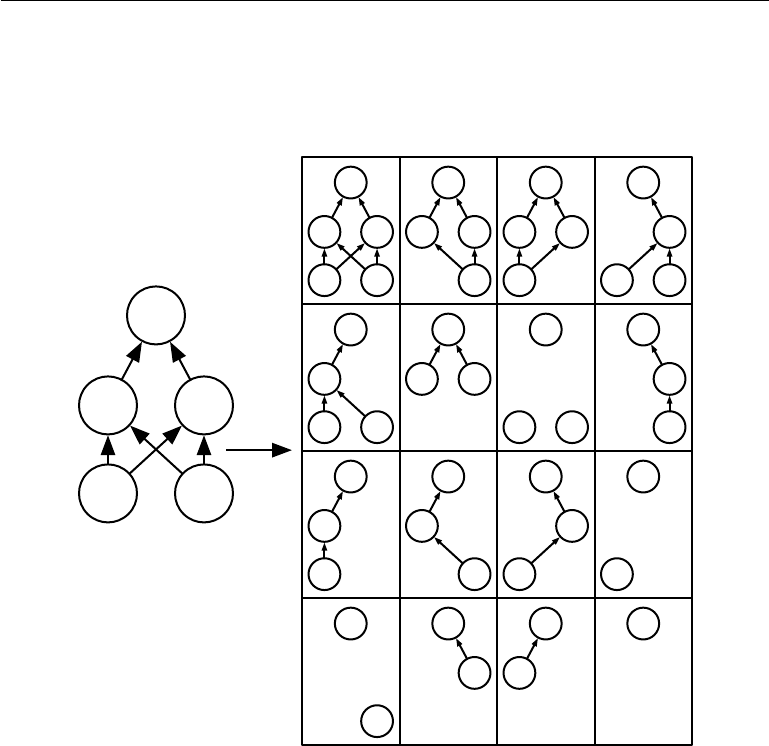

В стандартной нейронной сети производная, полученная каждым параметром, сообщает ему, как он должен измениться, чтобы, учитывая деятельность остальных блоков, минимизировать функцию конечных потерь. Поэтому блоки могут меняться, исправляя при этом ошибки других блоков. Это может привести к чрезмерной совместной адаптации (co-adaptation), что, в свою очередь, приводит к переобучению, поскольку эти совместные адаптации невозможно обобщить на данные, не участвовавшие в обучении. Авторы выдвинула гипотезу, что Dropout предотвращает совместную адаптацию для каждого скрытого блока, делая присутствие других скрытых блоков ненадежным. Поэтому скрытый блок не может полагаться на другие блоки в исправлении собственных ошибок.

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/dropout_usual_nn.PNG?token=AgsinOM2jwZYI38lTJT8vFm5hQ6pFrahks5cf3XZwA%3D%3D'>

<img src='https://github.com/fogside/fintech_dev/blob/master/spring_2019/04_rnn_dropout/dropout.PNG?raw=true'>

<b>Можно тестировать :)</b>
<br><br><br><br>

<img src='https://thumbs.gfycat.com/EmbarrassedBoldAvocet-small.gif'>

<b>Упс, что-то пошло не так. Но что?</b>
<br><br><br><br>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/dropout_test.PNG?token=AgsinGOjd8ZoKF_FbSo2YDKV-ZPvJc6Yks5cf3XYwA%3D%3D'>

<img src='https://raw.githubusercontent.com/fogside/fintech_dev/master/spring_2019/04_rnn_dropout/dropout_mnist.PNG?token=AgsinGlklAtZy_kbKz5QIlUL8992SJlpks5cf3XXwA%3D%3D'>

Преимущества:
- Предотвращает переобучение;
- Возможность комбинирования ответов больших нейронных сетей во время тестирования.

Недостатки:
- Необходимость изменять нейронную сеть для проведения тестирования.

### Inverted Dropout

Идея: умножать функцию активации на коэффициент не во время
тестового этапа, а во время обучения.
Этап обучение:
\begin{aligned}
y^{(l+1)}_i &= f(\frac{1}{p}w^{(l+1)}_i(r^{(l)} * y^{(l)}) + b^{(l+1)}_i)
\end{aligned}

Этап тестирования:
\begin{aligned}
y^{(l+1)}_i &= f(w^{(l+1)}_iy^{(l)} + b^{(l+1)}_i)
\end{aligned}

## DropConnect 

<img src='https://i.gifer.com/1g0.gif'>

<img src='https://cdn-images-1.medium.com/max/800/1*ZsnVe7r2856hseYhGiYpbg.png'>

Dropout:
<img src='https://i.stack.imgur.com/CewjH.png'>

DropConnect:
<img src='https://i.stack.imgur.com/CewjH.png'>

<br><br>

## Dropout и RNN

https://arxiv.org/pdf/1506.02557.pdf

<img src='https://cdn-images-1.medium.com/max/800/1*x0Qr982CQMv6lBRgsA9BUw.png'>